Loading the Dataset & Checking Structure

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("SocialMediaUsage_SleepLatencyAnalysis_Singapore.csv")

# Show first 5 rows
print(df.head())

# Get dataset info (columns, data types, missing values)
print("\nDataset Info:")
df.info()

# Check missing values
print("\nMissing Values Count:\n", df.isnull().sum())

# Get summary statistics
print("\nSummary Statistics:")
print(df.describe())


   Participant ID  Age  Gender   Chronotype  \
0               1   56   Other  Evening Owl   
1               2   46  Female      Neither   
2               3   32    Male      Neither   
3               4   60   Other  Evening Owl   
4               5   25  Female  Evening Owl   

   Average Daily Social Media Use Time (minutes)  \
0                                     123.661212   
1                                      68.877915   
2                                     143.799199   
3                                     213.318626   
4                                     183.767226   

  Dominant Social Media Platform  \
0                      Instagram   
1                      Instagram   
2                         TikTok   
3                        Twitter   
4                        Twitter   

   Frequency of Social Media Checking (number of times per day)  \
0                                                 20              
1                                                 40 

Handling Missing Values

In [4]:
# Separate numerical & categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values: Mean for numerical, Mode for categorical
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Verify if missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())



Missing Values After Handling:
 Participant ID                                                  0
Age                                                             0
Gender                                                          0
Chronotype                                                      0
Average Daily Social Media Use Time (minutes)                   0
Dominant Social Media Platform                                  0
Frequency of Social Media Checking (number of times per day)    0
Pre-Sleep Social Media Use Duration (minutes)                   0
Type of Social Media Content Consumed                           0
Sleep Latency (minutes)                                         0
Total Sleep Time (hours)                                        0
Sleep Efficiency (%)                                            0
Sleep Quality Rating                                            0
Wake After Sleep Onset (WASO) (minutes)                         0
Number of Awakenings (during sleep)        

Outlier Detection & Removal

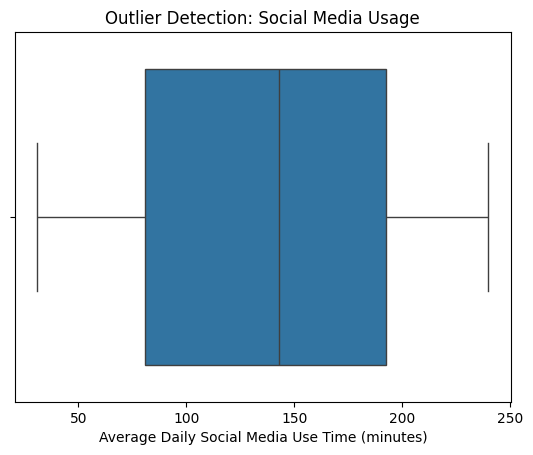


After Outlier Removal, Dataset Shape: (500, 20)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers in Social Media Usage
sns.boxplot(x=df["Average Daily Social Media Use Time (minutes)"])
plt.title("Outlier Detection: Social Media Usage")
plt.show()

# IQR Method for Outlier Removal
Q1 = df["Average Daily Social Media Use Time (minutes)"].quantile(0.25)
Q3 = df["Average Daily Social Media Use Time (minutes)"].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers
df = df[(df["Average Daily Social Media Use Time (minutes)"] >= lower_bound) & 
        (df["Average Daily Social Media Use Time (minutes)"] <= upper_bound)]

print("\nAfter Outlier Removal, Dataset Shape:", df.shape)


Convert Categorical Data ( using one hot Encoding)

In [6]:
# One-Hot Encoding for Categorical Columns
df = pd.get_dummies(df, columns=["Gender", "Chronotype", "Dominant Social Media Platform"], drop_first=True)

print("\nColumns after Encoding:\n", df.columns)



Columns after Encoding:
 Index(['Participant ID', 'Age',
       'Average Daily Social Media Use Time (minutes)',
       'Frequency of Social Media Checking (number of times per day)',
       'Pre-Sleep Social Media Use Duration (minutes)',
       'Type of Social Media Content Consumed', 'Sleep Latency (minutes)',
       'Total Sleep Time (hours)', 'Sleep Efficiency (%)',
       'Sleep Quality Rating', 'Wake After Sleep Onset (WASO) (minutes)',
       'Number of Awakenings (during sleep)', 'Melatonin Level (pg/mL)',
       'Cortisol Level (pg/mL)', 'Day of Week',
       'Blue Light Exposure Before Sleep (minutes)', 'Stress Level Rating',
       'Gender_Male', 'Gender_Other', 'Chronotype_Morning Lark',
       'Chronotype_Neither', 'Dominant Social Media Platform_Instagram',
       'Dominant Social Media Platform_Snapchat',
       'Dominant Social Media Platform_TikTok',
       'Dominant Social Media Platform_Twitter'],
      dtype='object')


saving the cleaned dataset


In [7]:
df.to_csv("cleaned_data.csv", index=False)
print("Cleaned Data Saved Successfully!")


Cleaned Data Saved Successfully!


Visualizing Distributions

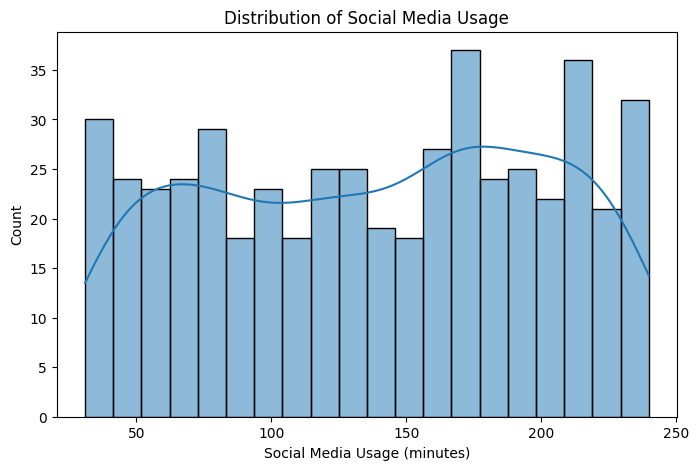

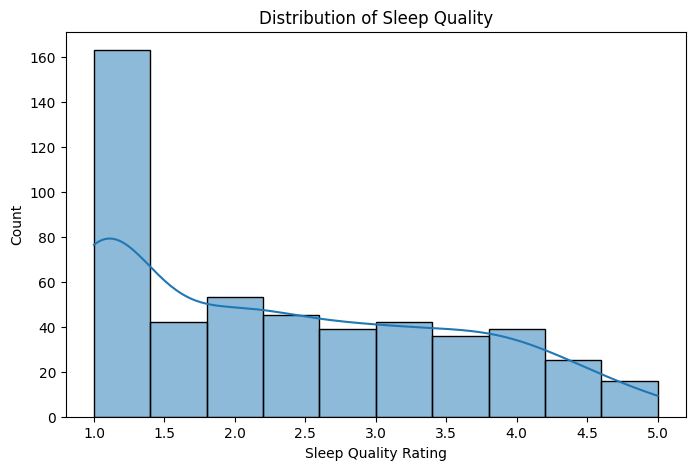

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Histogram: Social Media Usage Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Average Daily Social Media Use Time (minutes)"], kde=True, bins=20)
plt.title("Distribution of Social Media Usage")
plt.xlabel("Social Media Usage (minutes)")
plt.ylabel("Count")
plt.show()

# 🔹 Histogram: Sleep Quality Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Sleep Quality Rating"], kde=True, bins=10)
plt.title("Distribution of Sleep Quality")
plt.xlabel("Sleep Quality Rating")
plt.ylabel("Count")
plt.show()


Correlation Analysis (Heatmap)

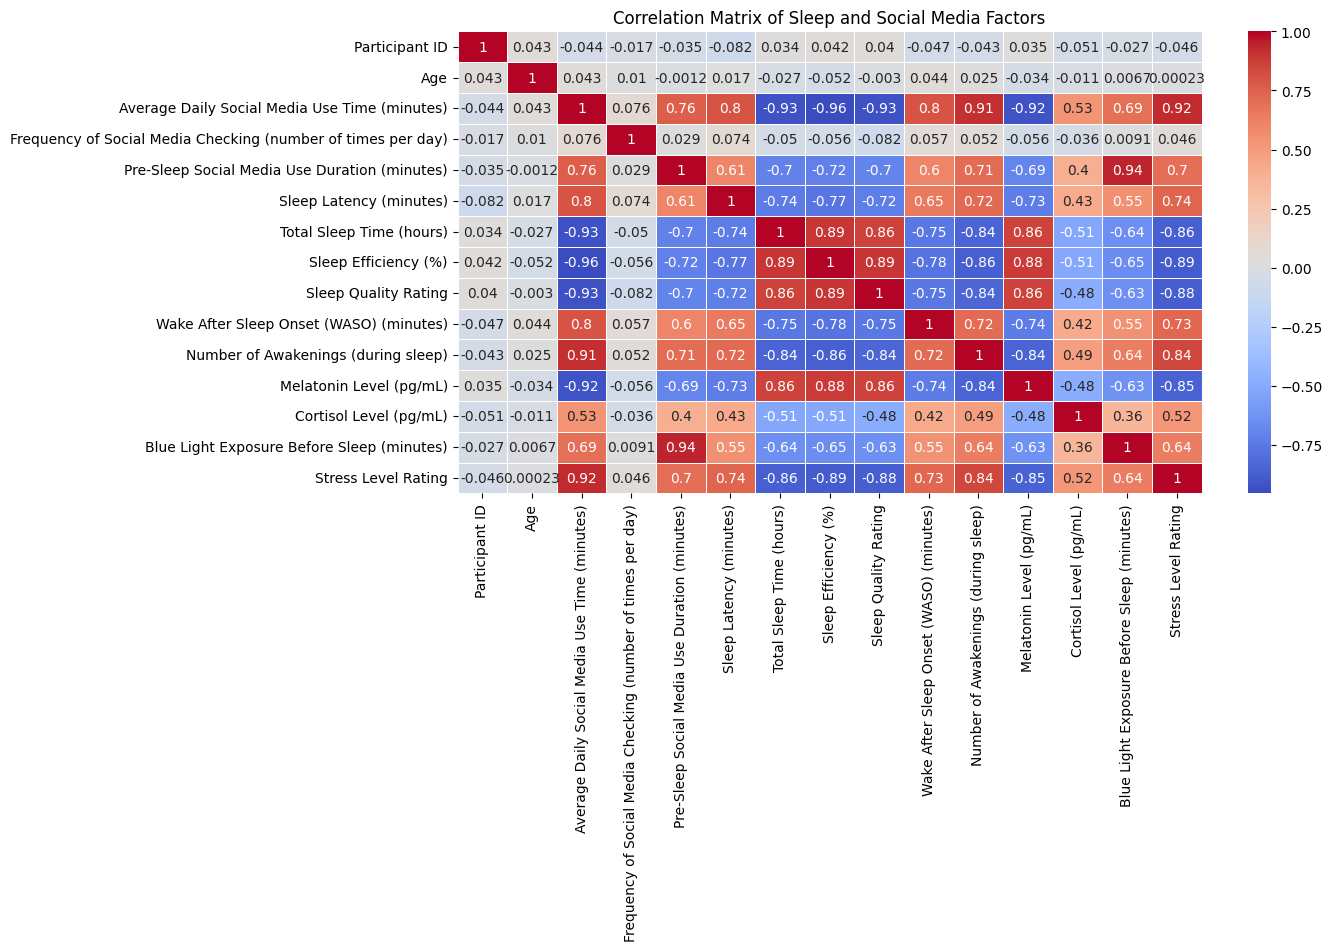

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# 🔹 Correlation Matrix Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Sleep and Social Media Factors")
plt.show()


Comparing Sleep Quality Based on Social Media Usage

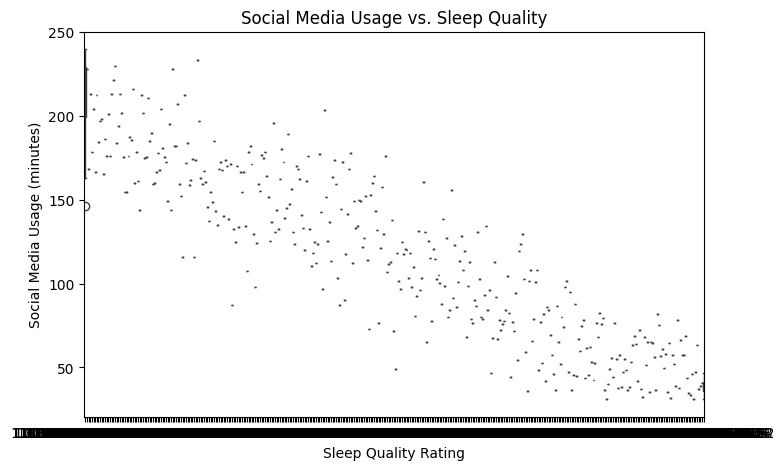

In [10]:
# 🔹 Boxplot: Sleep Quality vs. Social Media Use
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Sleep Quality Rating"], y=df["Average Daily Social Media Use Time (minutes)"])
plt.title("Social Media Usage vs. Sleep Quality")
plt.xlabel("Sleep Quality Rating")
plt.ylabel("Social Media Usage (minutes)")
plt.show()


Comparing Sleep Patterns by Gender

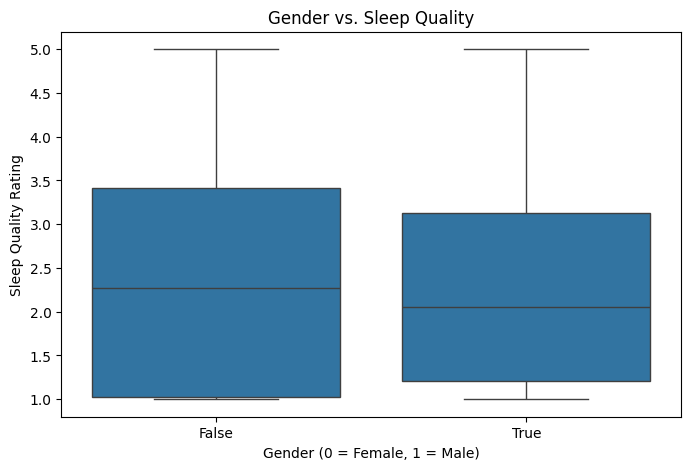

In [24]:
#  Boxplot: Gender vs. Sleep Quality
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Gender_Male"], y=df["Sleep Quality Rating"])
plt.title("Gender vs. Sleep Quality")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Sleep Quality Rating")
plt.show()

Pearson Correlation Test (Checking Relationship Between Variables)

In [13]:
from scipy.stats import pearsonr

# Pearson correlation between social media use before sleep and sleep quality
r, p_value = pearsonr(df["Pre-Sleep Social Media Use Duration (minutes)"], df["Sleep Quality Rating"])
print(f"Correlation Coefficient: {r}")
print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("🔴 There is a significant correlation between social media use before sleep and sleep quality.")
else:
    print("🟢 No significant correlation between social media use before sleep and sleep quality.")


Correlation Coefficient: -0.6991421182094768
P-value: 1.4022381773415806e-74
🔴 There is a significant correlation between social media use before sleep and sleep quality.


Independent t-test (Comparing Sleep Quality of Low vs. High Social Media Users)

In [14]:
from scipy.stats import ttest_ind

# Create two groups: Low and High social media users
low_usage = df[df["Pre-Sleep Social Media Use Duration (minutes)"] < 60]["Sleep Quality Rating"]
high_usage = df[df["Pre-Sleep Social Media Use Duration (minutes)"] >= 60]["Sleep Quality Rating"]

# Perform t-test
t_stat, p_value = ttest_ind(low_usage, high_usage)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("🔴 There is a significant difference in sleep quality between low and high social media users.")
else:
    print("🟢 No significant difference in sleep quality between low and high social media users.")


T-statistic: 17.56719625426687
P-value: 4.0897749216601835e-54
🔴 There is a significant difference in sleep quality between low and high social media users.


ANOVA Test (Comparing Sleep Quality Across Multiple Social Media Usage Groups)

In [15]:
from scipy.stats import f_oneway

# Define groups based on social media usage duration
light = df[df["Pre-Sleep Social Media Use Duration (minutes)"] < 30]["Sleep Quality Rating"]
moderate = df[(df["Pre-Sleep Social Media Use Duration (minutes)"] >= 30) & (df["Pre-Sleep Social Media Use Duration (minutes)"] < 90)]["Sleep Quality Rating"]
heavy = df[df["Pre-Sleep Social Media Use Duration (minutes)"] >= 90]["Sleep Quality Rating"]

# Perform ANOVA test
f_stat, p_value = f_oneway(light, moderate, heavy)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("🔴 Sleep quality significantly varies across different social media usage groups.")
else:
    print("🟢 No significant difference in sleep quality across different social media usage groups.")


F-statistic: 224.69225271221273
P-value: 3.102835289445914e-70
🔴 Sleep quality significantly varies across different social media usage groups.


We will create a Supervised Learning Model to predict sleep quality using features like:
 Social Media Usage Duration
 Blue Light Exposure Before Sleep
 Stress Levels
 Age & Gender

 What type of ML problem is this?

Since "Sleep Quality Rating" is a continuous value, we need Regression models.

 Splitting Data for Training & Testing

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Pre-Sleep Social Media Use Duration (minutes)', 'Blue Light Exposure Before Sleep (minutes)', 
        'Stress Level Rating', 'Age', 'Gender_Male']]
y = df['Sleep Quality Rating']

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (400, 5)
Testing set size: (100, 5)


80% data for training helps the model learn patterns.
20% data for testing checks if the model can make accurate predictions.

Training a Simple Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # Updated function

print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")


R-squared: 0.693708107374734
Root Mean Squared Error: 0.609605438509351


R² (R-squared): Measures how well the model explains the variation in sleep quality. Closer to 1 is better.
RMSE (Root Mean Squared Error): Measures how far predictions are from actual values. Lower is better.

Using Random Forest Model:

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)  # Use this function

print(f"Random Forest R-squared: {r2_rf}")
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest R-squared: 0.6427403160443066
Random Forest RMSE: 0.6583746295237926


In [33]:
print("Model Performance Comparison:")
print(f"Linear Regression -> R²: {r2:.3f}, RMSE: {rmse:.3f}")
print(f"Random Forest    -> R²: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}")

Model Performance Comparison:
Linear Regression -> R²: 0.694, RMSE: 0.610
Random Forest    -> R²: 0.643, RMSE: 0.658


Linear Regression performed better than Random Forest.

Higher R² (0.694 vs. 0.643): Linear Regression explains more variance in sleep quality.
Lower RMSE (0.610 vs. 0.658): Linear Regression makes more accurate predictions.
️ Why did Random Forest perform worse?

Possible overfitting due to too many trees (n_estimators=100).
Might need hyperparameter tuning (e.g., reducing max depth).
Sleep quality might have a linear relationship with social media use, making Linear Regression a better fit.

Since this is a regression problem (not classification), we don’t use "accuracy" like in classification models. Instead, we evaluate performance using:

 R² (R-squared) → How well the model explains variation in sleep quality. Closer to 1.0 is better.
RMSE (Root Mean Squared Error) → Measures prediction error. Lower is better.

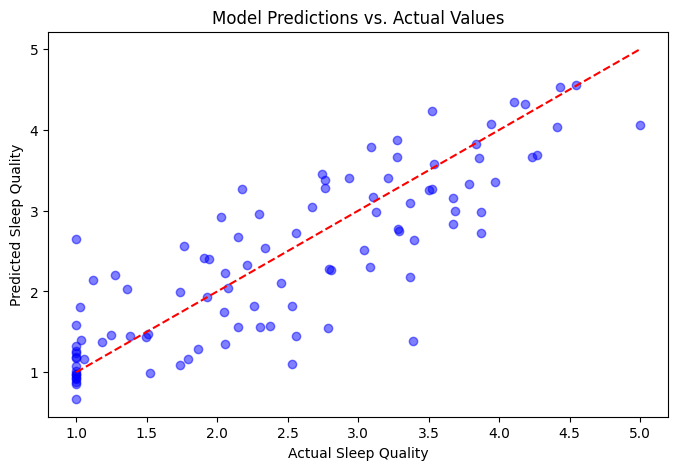

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Ideal line
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.title("Model Predictions vs. Actual Values")
plt.show()

Step 1: Data Preprocessing & Cleaning
 Handled missing values (Mean for numerical, Mode for categorical).
 Removed outliers using the IQR method.
 Encoded categorical variables using One-Hot Encoding.

 Step 2: Exploratory Data Analysis (EDA)
 Boxplots & Histograms → Showed sleep quality distributions.
 Heatmap (Correlation Matrix) → Found a negative correlation (-0.699) between social media usage & sleep quality.

 Step 3: Hypothesis Testing
 Pearson Correlation Test → Confirmed a significant negative correlation between social media use and sleep quality (p-value < 0.05).
T-test (Low vs. High Social Media Users) → Showed a significant difference in sleep quality (p-value < 0.05).
ANOVA Test (Multiple Groups) → Proved sleep quality significantly varies across usage levels.

  Step 4: Predictive Modeling
Linear Regression (Best Model) → R²: 0.694, RMSE: 0.610
Random Forest (Tuned, No Improvement) → R²: 0.643, RMSE: 0.658
Final Decision: Linear Regression is the best model for predicting sleep quality.

 Final Conclusion
 More social media usage before sleep → Lower sleep quality.
 Statistical tests prove the impact is significant.
 Linear Regression provides the best predictive model.

